In [1]:
## spot-checking
## # Load libraries
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# retrieve variables
%store -r raw_data2
%store -r raw_data_uncorr2

In [4]:
## SVC with complete data
## devide train test tentative with stratification to keep the distribution
## raw_data parames [28] / raw_data_uncorr [24]
X = raw_data_uncorr2.iloc[:,:24]
Y = raw_data_uncorr2.iloc[:,24]

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.45,
                                                   stratify=Y)    

In [5]:
## scaling train and test dataset with StandardScaler since our distribution are normal more or less
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))

In [6]:
## Kneighbors (default parameter 5)
knn_clf = KNeighborsClassifier(n_neighbors=11, algorithm = 'brute')
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=10, n_jobs=-1, verbose=5)
'Accuracy media: {:0.3f}'.format(np.mean(knn_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.4s finished


'Accuracy media: 0.982'

In [7]:
## Kneighbors with best found parameters
knn_clf = KNeighborsClassifier(n_neighbors=11, algorithm = 'brute')
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=10, n_jobs=-1, verbose=5)
'Accuracy media: {:0.3f}'.format(np.mean(knn_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


'Accuracy media: 0.982'

In [8]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=11)

In [9]:
expected = y_test
predicted = knn_clf.predict(X_test)
knn_cnf_matrix = confusion_matrix(expected, predicted)
knn_score_tuned = cross_val_score(knn_clf, X_test, y_test, cv = 10)
'Accuracy media tuned: {:0.3f}'.format(np.mean(knn_score_tuned))

'Accuracy media tuned: 0.967'

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

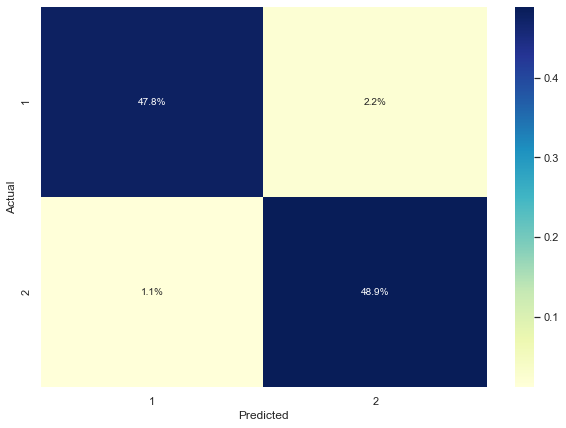

In [10]:
data = knn_cnf_matrix
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
sn.heatmap(df_cm/np.sum(data), cmap="YlGnBu", annot=True, fmt='.1%', annot_kws={"size": 10})# font size